In [29]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import random

In [30]:
def StandartDev(arr):
    if len(arr) == 0:
        return "ERROR: LENGTH"

    Sred = 0
    for elem in arr:
        if type(elem) != int:
            print(type(elem))
            return "ERROR OF TYPE ELEM"
        
        Sred += elem
        
    Sred = Sred/len(arr)
    
    Sum = 0 
    for elem in arr:
        Sum += (elem - Sred)*(elem - Sred)
        
    if len(arr) == 1: 
        return "ERROR : division by 0 !! "
#    print(Sred)
#    print(Sum)
    return math.sqrt(Sum /len(arr)) 
   

In [31]:
def sredlin(a,interval):
    len_arr = len(a)
    otv = []
    n = 2 * interval + 1
    
    for index in range(interval,len_arr-interval):
        Sum = 0
        
        for i in range(index-interval,index+interval+1):# interval
            Sum += a[i]
            
        Sum = Sum / n
        otv.append(Sum)

    return otv

In [32]:
def skleika(a,size,dop):
    if a == []:
        return []
    
    first = dop + a 
    otv  = sredlin(first,size)
    return otv

In [33]:
def Rnd(Min = 0,Max = 30,kolvo = 30,minus = "off"):
    
    data = []
    for i in range(kolvo):
        data.append(random.randint(Min,Max))
    
    return data

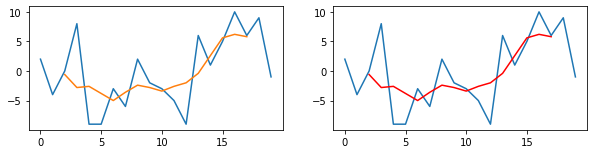

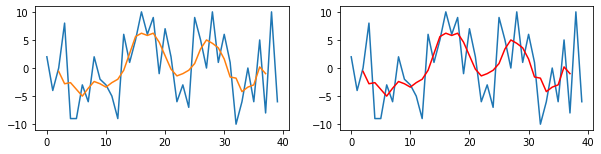

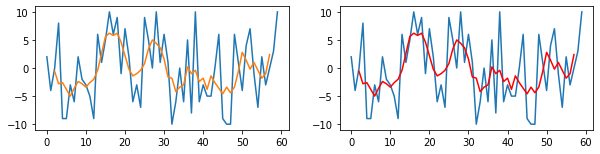

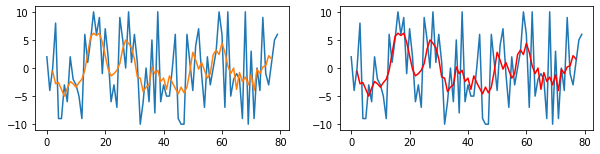

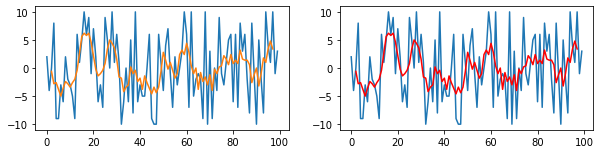

In [34]:
Min = -10     # числа от мин
Max = 10      # числа до макс

data = []     # Весь массив 
solution = [] # Промежуточный ответ (есть ли он)
dop = []      # 

size = 2      # Размер для подсчёта средней линии 
otv = []      # Вся средняя линия 

for i in range(5):
    
    block_size = 20 
    
    for j in range(block_size):
        data.append(random.randint(Min,Max))
  #  data.append(100)

   # block_size += 1
    
    dop += data[i*block_size - 2*size : i*block_size]
    
    solution = skleika(data[i*block_size :(i+1)*block_size],size,dop)   
    if solution != []:
        dop = []
        
    otv += solution
    
  #  print("data --- ",data,"len ---" ,len(data))
  #  print("otv  --- ",otv,"len ---" ,len(otv))    
    
    plt.figure(figsize = (10,5))
    plt.subplot(221)
    plt.plot(data)
    plt.plot(range(size,len(data) - size ),otv)
    plt.subplot(222)
    plt.plot(data)
    plt.plot(range(size,len(data)-size),sredlin(data,size),c = 'red')

In [35]:
def diskretsred(data,prom,diskret):
    kolvo = round(prom/ diskret)

    otv = []
    
    #print ("kolvo = ",kolvo)
    
    i = 0
    
    while i + kolvo <= len(data):
        summa = 0
        
        for elem in data[i: i + kolvo]:
            summa += elem
        summa /= kolvo
        i += 1
        otv.append(summa)

    return otv

2


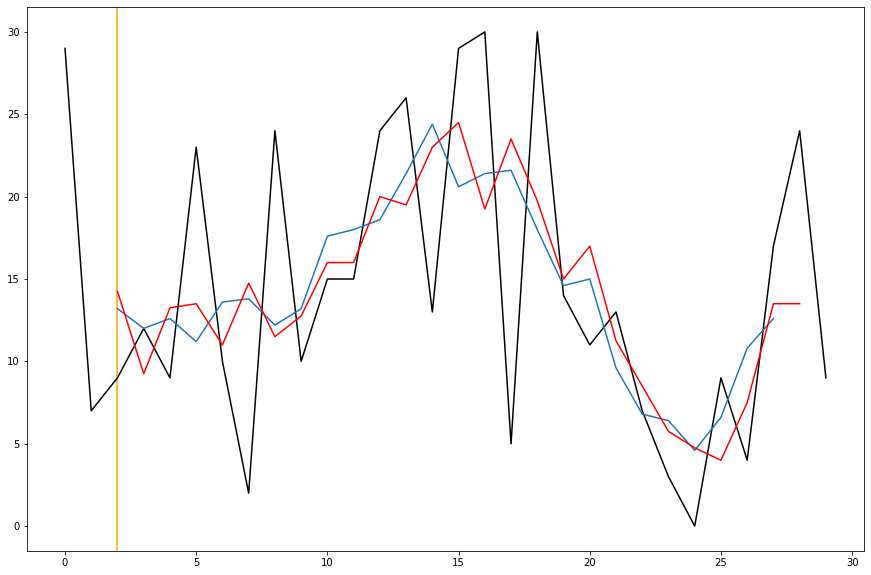

In [36]:
data = Rnd()

prom = 1 
disk = 0.23

otv_sred = sredlin(data,2) 
otv_sreddisk = diskretsred(data,prom,disk)

start_sred_disk = math.ceil(prom/(2*disk)) - 1

plt.figure(figsize = (15,10))

plt.axvline(start_sred_disk,c = "orange")
#plt.subplot(221)
plt.plot(data,c="black")
plt.plot(range(2,len(data)-2),otv_sred)
#plt.subplot(222)
#plt.plot(data)
plt.plot(range(start_sred_disk,len(otv_sreddisk)+start_sred_disk),otv_sreddisk,c = "red")

print(start_sred_disk)


# Линейная Интерполяция

In [37]:
def LinearChange(x1,y1,x2,y2,x):
    y = []

    for elem in x:
        y.append( (y2-y1)*(elem - x1)/(x2-x1) + y1 )
    return y

def LineInt(data):
    
    otv = []
    
    i = 0
    
    while i < len(data):
        if data[i] < 0:
            x = []
            x1 = i-1
            y1 = data[x1]
            while data[i] < 0:
                x.append(i)
                i += 1
            x2 = i 
            y2 = data[i]
            otv += LinearChange(x1,y1,x2,y2,x)
        else:
            otv.append(data[i])
            i +=1
    return otv

In [38]:
LinearChange(0,0,10,10,[1,2,3,4,5,6,7,8,9])


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

[14, 24, 23, 23, 27, 21.666666666666668, 16.333333333333336, 11, 26, 24]
[14, 24, 23, 23, 27, -10, -10, 11, 26, 24]


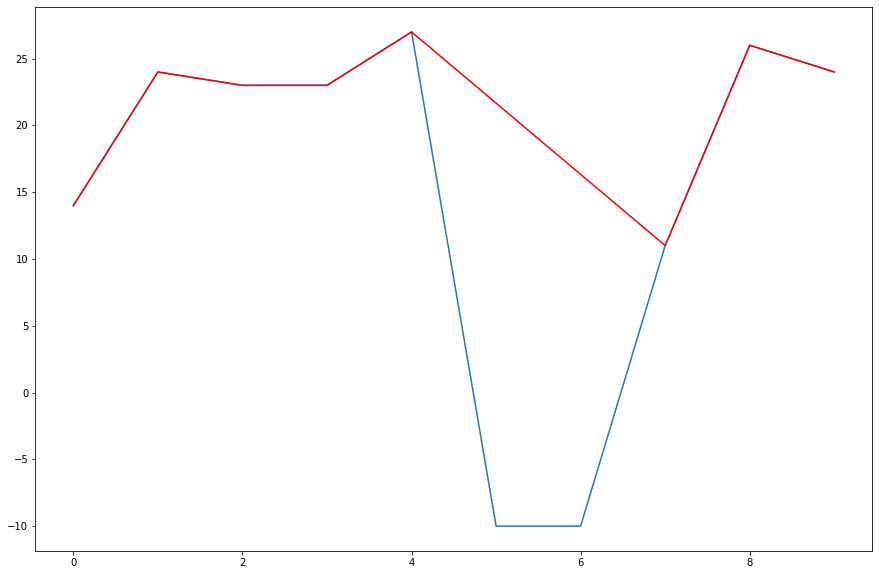

In [39]:
Min = 0     # числа от мин
Max = 30      # числа до макс

data = []
len_data = 10
for i in range(len_data):
    data.append(random.randint(Min,Max))

for i in range(5,7):
    data[i] = -10

otv = LineInt(data)
print(otv)
print(data)
plt.figure(figsize = (15,10))
plt.plot(data)
plt.plot(otv,c = "red")

# Квадратичная Интерполяция

In [40]:
def check_data(nodes,values):
    #Проверка входных данных на тип list
    if type(nodes) is not list or type(values) is not list:
        return "Incorrect type of data!!!"
    if len(nodes) != 3 or len(nodes) != len(values):
        return "Data is not complete!!!"
    # Проверка типа узлов
    for elem in nodes:
        if type(elem) is not int and type(elem) is not float:
            return "Incorrect type of nodes data!!!"
        
    for elem in values:
        if type(elem) is not int and type(elem) is not float:
            return "Incorrect type of values data!!!"
        
    # Узлы должны быть в порядке возрастания
    if nodes != sorted(nodes): 
        return "Nodes order is incorrect!!!"
    
    return 0

def QuadInt_simple(nodes,values,N = 3):
    # nodes - Узлы
    #values - значения при узлах 
    
    if N < 3:
        return "Incorrect count N !!!"
    
    check = check_data(nodes,values)
    
    if check != 0:
        return check
    
    x_coords = [nodes[0] + i*(nodes[2] - nodes[0]) / (N - 1) for i in range(N)]
    y_coords = []
    
    for coord in x_coords:
        sum_0 = values[0]*(coord - nodes[1])*(coord - nodes[2]) / ((nodes[0] - nodes[1])*(nodes[0] - nodes[2]))
        sum_1 = values[1]*(coord - nodes[0])*(coord - nodes[2]) / ((nodes[1] - nodes[0])*(nodes[1] - nodes[2]))
        sum_2 = values[2]*(coord - nodes[0])*(coord - nodes[1]) / ((nodes[2] - nodes[0])*(nodes[2] - nodes[1]))
        
        y_coords.append(sum_0 + sum_1 + sum_2)
        
    return x_coords,y_coords


def QuadInt_coords(nodes,values,x_coords):
    # nodes - Узлы
    #values - значения при узлах 
    
    #Проверка входных данных на тип list
    if type(x_coords) is not list:
        return "Incorrect type of data!!!"
     
    for elem in x_coords:
        if type(elem) is not int and type(elem) is not float:
            return "Incorrect type of x_coords data!!!"
    
    check = check_data(nodes,values)
    
    if check != 0:
        return check
    
    y_coords = []
    
    for coord in x_coords:
        sum_0 = values[0]*(coord - nodes[1])*(coord - nodes[2]) / ((nodes[0] - nodes[1])*(nodes[0] - nodes[2]))
        sum_1 = values[1]*(coord - nodes[0])*(coord - nodes[2]) / ((nodes[1] - nodes[0])*(nodes[1] - nodes[2]))
        sum_2 = values[2]*(coord - nodes[0])*(coord - nodes[1]) / ((nodes[2] - nodes[0])*(nodes[2] - nodes[1]))
        
        y_coords.append(sum_0 + sum_1 + sum_2)
        
    return y_coords

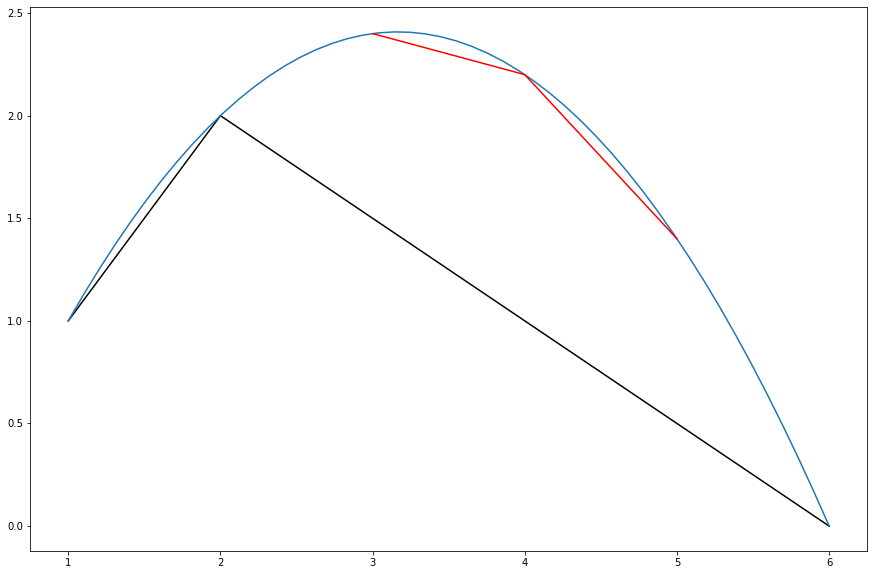

In [41]:
nodes = [1,2,6]
values = [1,2,0]

n = 50

x_coords = [3,4,5]

quad_simple = QuadInt_simple(nodes,values,N = n)

plt.figure(figsize = (15,10))
plt.plot(nodes,values,c = "black")
plt.plot(quad_simple[0],quad_simple[1])

quad_coords = QuadInt_coords(nodes,values,x_coords)

plt.plot(x_coords,quad_coords,c = "red")

In [42]:
def QuadInt(data,Flag = -1):
    
    otv = []
    l_data = len(data)
    
    nodes  = [0,0,-1]
    values = [0,0,-1]
    
    if Flag == 1: # нужно разобрать случай
        i = l_data - 1 # последний эл
        if data[-1] < 0:
            return "Incorrect DATA"
        elif data[-2] < 0:
            x_coords = []
            otv.append(data[i])
            x1 = i
            y1 = data[i]
            i-=1
            while data[i] < 0:
                x_coords.append(i)
                i-=1
            x2 = i
            y2 = data[i]
            otv += LinearChange(x1,y1,x2,y2,x_coords) 
                
                
        while i >= 0:
            if data[i] < 0:
                x_coords = []
                nodes[2] = i + 2
                nodes[1] = i + 1
                values[2] = otv[l_data-i-1-2]
                values[1] = otv[l_data-i-1-1]
                while data[i] < 0:
                    x_coords.append(i)
                    i -= 1
                nodes[0] = i
                values[0] = data[i]
                
                otv += QuadInt_coords(nodes,values,x_coords)
            else:
                otv.append(data[i])
                i -= 1
                
        otv_1 = otv[-1::-1]
        return otv_1
                
    else:
        i = 0
        if(data[0] < 0):
            return "ERROR first elem is empty "
        elif data[1] < 0: ############### НАДО ПРОВЕРИТЬ РАБОТАЕТ ЛИИИИИИИИ
            otv.append(data[0])
            x_coords = []
            x1 = 0
            y1 = data[0]
            i = 1
            while data[i] < 0:
                x_coords.append(i)
                i += 1
            x2 = i
            y2 = data[i]
            otv += LinearChange(x1,y1,x2,y2,x_coords)       
            
    
        while i < l_data:
            if data[i] < 0:
                x_coords = []
                nodes[0] = i - 2
                nodes[1] = i - 1
                values[0] = otv[i-2]
                values[1] = otv[i-1]
                while data[i] < 0:
                    x_coords.append(i)
                    i += 1
                nodes[2] = i
                values[2] = data[i]
            
                otv += QuadInt_coords(nodes,values,x_coords)
                
            else:
                otv.append(data[i])
                i += 1
            
    return otv
    
    

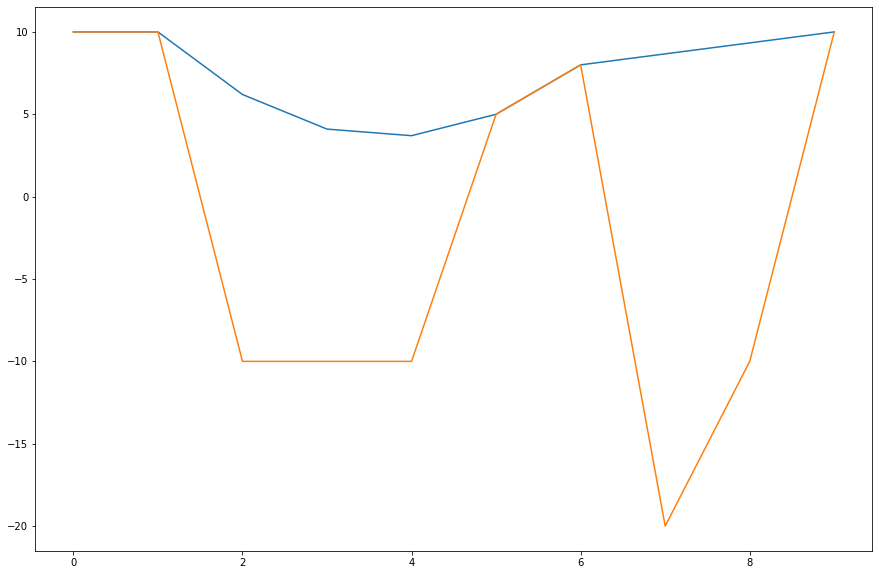

In [43]:
a_0 = [10,10,-10,-10,-10,5,8,-20,-10,10]


a_10 = QuadInt(a_0,Flag = 1)
plt.figure(figsize = (15,10))
plt.plot(a_10)
plt.plot(a_0)


In [44]:
def InterP(data,interpolatin = "linear",flag = -1):
    if interpolatin == "linear":
        return LineInt(data)
    elif interpolatin == "quadratic":
        return QuadInt(data,Flag = flag)

[12, 3, 19, 14, 4, -10, -10, 12, 6, 19]
[12, 3, 19, 14, 4, 11.0, 13.666666666666668, 12, 6, 19]


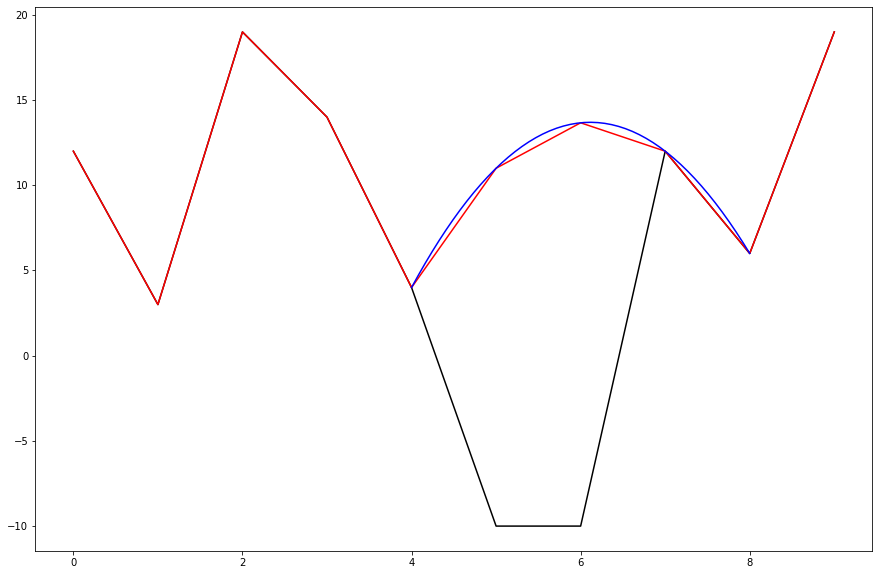

In [45]:
Min = 0     # числа от мин
Max = 30      # числа до макс

data = []
len_data = 10
for i in range(len_data):
    data.append(random.randint(Min,Max))

for i in range(5,7):
    data[i] = -10

otv = QuadInt(data,Flag = 1)

nodes = [4,7,8]
values = [data[4],data[7],data[8]]
n = 50

quad_simple = QuadInt_simple(nodes,values,N = n)

print(data)
print(otv)

plt.figure(figsize = (15,10))
plt.plot(data, c = "black")
plt.plot(otv,c = "red")
plt.plot(quad_simple[0],quad_simple[1],c = "blue")

In [46]:
def extraP(data,kolvo,extrapolation = "const",flag = "all"):
    
    l_data = len(data)
    otv = []
    
    i = 0
    j = 0
    
    kol = kolvo // 2
    
    if extrapolation == "const":

        if flag == "first" or flag ==  "all":
            while i < kol:
                otv.append(data[0])
                i += 1
            
        for k in range(l_data):
            otv.append(data[k])
            
        if flag == "last" or flag ==  "all":
            while j < kolvo - i - 1:
                otv.append(data[-1])
                j += 1
            
        return otv
            
    elif extrapolation == "symmetric":
        
        
        if flag == "first" or flag ==  "all":
            while i < kol:
                otv.append(data[kol-i])
                i += 1
        
        for k in range(l_data):
            otv.append(data[k])
        
        if flag == "last" or flag ==  "all":
            while j < kolvo -i -1:
                otv.append(data[-2-j])
                j +=1
        
        return otv 

    elif extrapolation == "asymmetric":
        
        if flag == "first" or flag ==  "all":
            while i < kol:
                dop = LinearChange( 0,data[0],(kol-i),data[kol-i],[i-kol]) # def LinearChange(x1,y1,x2,y2,x):
                dop [0] = int(dop[0]) ######
                otv += dop
                i += 1
        
        for k in range(l_data):
            otv.append(data[k])
            
        if flag == "last" or flag ==  "all":    
            while j < kolvo -i -1:
                dop = LinearChange((l_data-1),data[-1],(l_data-2-j),data[-2-j],[l_data + j])
                dop [0] = int(dop[0]) ######
                otv += dop
                j +=1
        
        return otv
    
    elif extrapolation == "periodic":
        
        if flag == "first" or flag ==  "all":
            while i < kol:
                otv.append(data[i-kol])
                i += 1
        
        for k in range(l_data):
            otv.append(data[k])
            
        if flag == "last" or flag ==  "all":    
            while j < kolvo -i -1:
                otv.append(data[j])
                j +=1
        
        return otv 
    else:
        return "Error " + extrapolation
    

In [47]:
data = Rnd(0,30,20)
print(data)

[0, 16, 6, 30, 20, 6, 28, 11, 4, 29, 0, 29, 25, 15, 11, 4, 29, 14, 23, 22]


In [48]:
prom = 3.0
diskret = 1.0


kolvo = round(prom / diskret)


constExtraP = extraP(data,kolvo,extrapolation = "const")
symmetricExtraP = extraP(data,kolvo,extrapolation = "symmetric")
asymmetricExtraP = extraP(data,kolvo,extrapolation = "asymmetric")
periodicExtraP = extraP(data,kolvo,extrapolation = "periodic")


print("kolvo - ",kolvo,"\tLeft - ",kolvo//2,"\tRight - ",kolvo-1-kolvo//2)
print("data      \t",data)
print("const     \t",constExtraP)
print("symmetric \t",symmetricExtraP)
print("asymmetric\t",asymmetricExtraP)
print("periodic  \t",periodicExtraP)



kolvo -  3 	Left -  1 	Right -  1
data      	 [0, 16, 6, 30, 20, 6, 28, 11, 4, 29, 0, 29, 25, 15, 11, 4, 29, 14, 23, 22]
const     	 [0, 0, 16, 6, 30, 20, 6, 28, 11, 4, 29, 0, 29, 25, 15, 11, 4, 29, 14, 23, 22, 22]
symmetric 	 [16, 0, 16, 6, 30, 20, 6, 28, 11, 4, 29, 0, 29, 25, 15, 11, 4, 29, 14, 23, 22, 23]
asymmetric	 [-16, 0, 16, 6, 30, 20, 6, 28, 11, 4, 29, 0, 29, 25, 15, 11, 4, 29, 14, 23, 22, 21]
periodic  	 [22, 0, 16, 6, 30, 20, 6, 28, 11, 4, 29, 0, 29, 25, 15, 11, 4, 29, 14, 23, 22, 0]


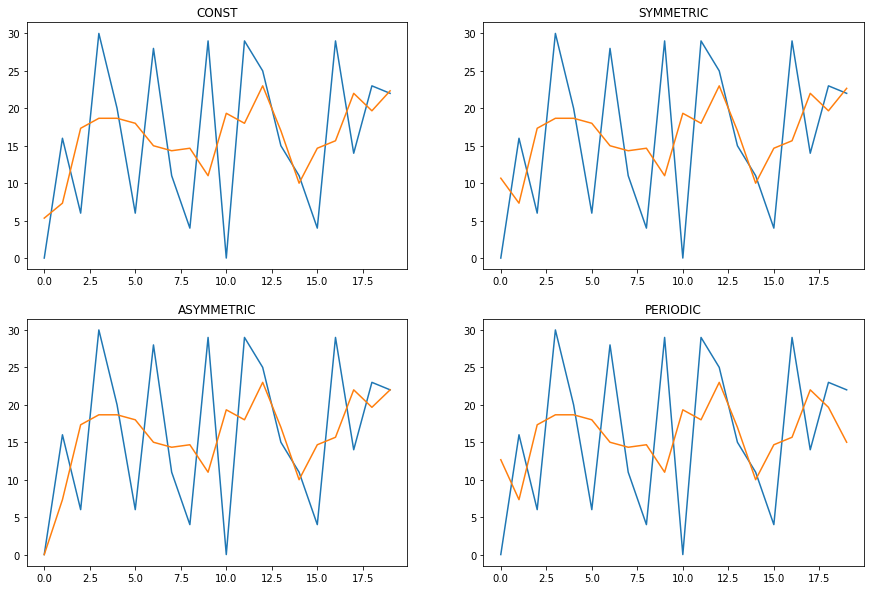

In [49]:
constSredDiskExp = diskretsred(constExtraP,prom,diskret)
symmetSredDiskExp = diskretsred(symmetricExtraP,prom,diskret)
AsymmetSredDiskExp = diskretsred(asymmetricExtraP,prom,diskret)
periodicSredDiskExp = diskretsred(periodicExtraP,prom,diskret)

plt.figure(figsize = (15,10))

plt.subplot(221)
plt.title("CONST")
plt.plot(data)
plt.plot(constSredDiskExp)


plt.subplot(222)
plt.title("SYMMETRIC")
plt.plot(data)
plt.plot(symmetSredDiskExp)


plt.subplot(223)
plt.title("ASYMMETRIC")
plt.plot(data)
plt.plot(AsymmetSredDiskExp)

plt.subplot(224)
plt.title("PERIODIC")
plt.plot(data)
plt.plot(periodicSredDiskExp)

In [62]:
def offline(data,inp = "on",prom = 1,disk = 0.25,interpol = "linear",FlagI = -1,extrapol = "const",Flag = "all"):
    if type(data) is not list:
        return "Incorrect type of data!!!"

    if inp == "on":
        prom = float(input("Промежуток \n"))
        disk = float(input("Дискретизация \n"))
        dop = int(input("Интерполяция \n1)linear \n2)quadratic \n"))
        if dop == 2:
            interpol = "quadratic"
            dop = int(input("Квадратичная интерполяция \n1)слева \n2)справа \n"))
            if dop == 1:
                FlagI = -1
            elif dop == 2:
                FlagI = 1
            else:
                print("Incorrect type quadratic FlagI")
        dop = int(input("Экстраполсяция \n1) const \n2)симметричная \n3)асимметричная \n4)периодическая \n"))   
        if dop == 1:
            extrapol = "const"
        elif dop == 2:
            extrapol = "symmetric"
        elif dop == 3:
            extrapol = "asymmetric"
        elif dop == 4:
            extrapol = "periodic"
        else:
            print("Incorrect type extrapolation")

    kolvo = round(prom/ diskret)
            
    dop =  InterP(data,interpolatin = interpol,flag = FlagI)
    dop = extraP(dop,kolvo,extrapolation = extrapol,flag = "all")
            
    otv = diskretsred(dop,prom,diskret)
        
    plt.figure(figsize = (15,10))

    plt.title(interpol + " " + extrapol)
    plt.plot(data,c = "red")
    plt.plot(otv)
    return otv

Промежуток 
5
Дискретизация 
1.0
Интерполяция 
1)linear 
2)quadratic 
1
Экстраполсяция 
1) const 
2)симметричная 
3)асимметричная 
4)периодическая 
1
[-3, 29, 0, 2, -2, 1, 26, 8, 29, 6, 11, 22, 6, 20, 29, -3, 30, 18, 5, 2, -4, -2, 12, 12, 14, 29, 14, 26, 24, 10, 15, 13, 0, 17, 14, 17, 7, 22, 2, 4, 22, 24, 12, 26, 14, 0, 25, 23, 2, 1]


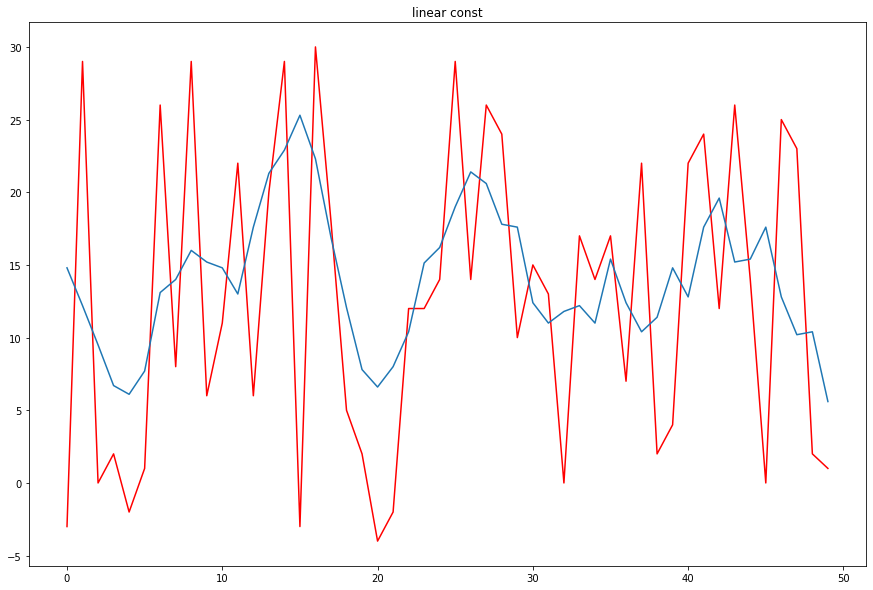

In [66]:
data = Rnd(Min = -5,Max = 30,kolvo = 50)
a = offline(data)
print(data)

МНК - Метод наименьших квадратов 

In [52]:
def least_square_method (data,nodes):
    start = nodes[0]
    
    l_data = len(data)
    l_nodes = len(nodes)
    
    if l_data != l_nodes :
        
        print("len(data) != len(nodes) ?????")
        return -1
    
    
    S_x = 0
    S_y = 0
    S_xx = 0
    S_xy = 0
    
    
    for i in nodes:
        S_x +=i
    for i in data:
        S_y += i
    for i in nodes:
        S_xx += i*i
    for i in range(l_data):
        S_xy += data[i] * nodes[i]
    
    a = (S_x * S_y - l_data * S_xy) / ( S_x*S_x - l_data * S_xx)
    b = S_y/l_data - a * S_x/l_nodes
    
    return a,b

[11, 16, 17, 11, 8, 1, 19, 20, 19, 19, 9, 18, 16, 10, 13, 0, 19, 7, 6, 10] 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


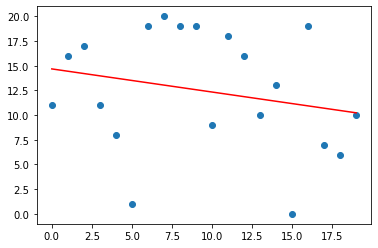

In [53]:
len_otr = 20
nodes = []
data = Rnd(0,20,len_otr)


for j in range(len_otr): 
    nodes.append(j)
    
print(data,"\n",nodes)    
lineurv = least_square_method(data,nodes)
y0 = lineurv[0]*nodes[0] + lineurv[1]
y1 = lineurv[0]*nodes[-1] + lineurv[1]
line = LinearChange(nodes[0],y0,nodes[-1],y1,nodes)
plt.scatter(list(range(len(data))),data)

plt.plot(range(len(line)),line,c = "r")

In [ ]:
def online_sred(data_1,data_2,prom = 1,disk = 0.25,
                interpol = "linear",FlagI = -1,extrapol = "const",
                Flag = "Last"):
    #data_1 предыдущие 
    #data_2 нынешние данные
    sred = []
    kolvo = round(prom / diskret)
    
    
    
    
    